### **Context:**
Ridesharing is a service that arranges transportation on short notice. It is a very volatile market and its demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time.  

### **Objective:**
Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in over 785 metropolitan areas with over 110 million users worldwide. As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting actionable insights from data that will help in the growth of the the business.

### **Key Questions:**
1. What are the different variables that influence the number of pickups?
2. Which factor affects the number of pickups the most? What could be the possible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?

### **Data Description:**
The data contains the details for the Uber rides across various boroughs (subdivisions) of New York City at an hourly level and attributes associated with weather conditions at that time.

* pickup_dt: Date and time of the pick-up
* borough: NYC's borough
* pickups: Number of pickups for the period (hourly)
* spd: Wind speed in miles/hour
* vsb: Visibility in miles to the nearest tenth
* temp: Temperature in Fahrenheit
* dewp: Dew point in Fahrenheit
* slp: Sea level pressure
* pcp01: 1-hour liquid precipitation
* pcp06: 6-hour liquid precipitation
* pcp24: 24-hour liquid precipitation
* sd: Snow depth in inches
* hday: Being a holiday (Y) or not (N)

### **Importing the necessary libraries**

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Loading the dataset**

In [3]:
# loading the dataset
df = pd.read_csv('Uber_Data.csv')

### **Data Overview**

In [4]:
# checking the top 5 rows
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,01-01-2015 01:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,01-01-2015 01:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,01-01-2015 01:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,01-01-2015 01:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,01-01-2015 01:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [6]:
# checking the last 5 rows
df.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,30-06-2015 23:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,30-06-2015 23:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,30-06-2015 23:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,30-06-2015 23:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,30-06-2015 23:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [7]:
# checking the random 5 rows of the data
df.sample(5)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
24369,02-06-2015 01:00,Bronx,28,17.0,4.0,54.0,51.0,1020.4,0.0,0.08,0.000000,0.0,N
2363,15-01-2015 23:00,Manhattan,3200,5.0,10.0,33.0,16.0,1015.4,0.0,0.00,0.000000,0.0,N
23122,25-05-2015 10:00,Bronx,44,3.0,10.0,66.0,53.0,1024.7,0.0,0.00,0.270833,0.0,Y
25702,10-06-2015 05:00,EWR,0,5.0,10.0,71.0,56.0,1008.8,0.0,0.00,0.010000,0.0,N
25205,07-06-2015 03:00,NaN,3,0.0,10.0,64.0,38.0,1018.4,0.0,0.22,0.000000,0.0,N


In [8]:
# checking the shape of the dataset
df.shape

(29101, 13)

- The dataset has 29,101 rows and 13 columns

In [9]:
# checking the basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


- All the columns have 29,101 observations except **borough** and **temp** which has 26058 and 28742 observations indicating that there are some missing values in them
- The **pickup_dt** column is being read as a 'object' data type but it should be in date-time format
- The **borough** and **hday** columns are of object type while the rest of the columns are numerical in nature
- The object type columns contain categories in them

In [10]:
# checking the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,28742.0,47.900019,19.798783,2.0,32.0,46.5,65.000000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


**Let's check the count of each unique category in each of the categorical/object type variables.**

In [ ]:
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       'Unknown'], dtype=object)

- We can observe that there are 6 unique boroughs present in the dataset for New York

In [ ]:
df['hday'].value_counts(normalize=True)

N    0.961479
Y    0.038521
Name: hday, dtype: float64

- The number of non-holiday observations is much more than holiday observations which make sense
- Around 96% of the observations are from non-holidays


In [11]:
# converting the data type of pickup_dt column to datatime
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format="%d-%m-%Y %H:%M")

In [12]:
# checking the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       28742 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


- There are now 10 numerical columns, 2 object type columns and 1 date-time column*

Now let's check the range of time period for which the data has been collected.

In [ ]:
# checking the date from which data observations have been started
df['pickup_dt'].min()

Timestamp('2015-01-01 01:00:00')

In [13]:
# checking the last date of the dataset
df['pickup_dt'].max()

Timestamp('2015-06-30 23:00:00')

- So the time period for the data is from Janunary to June for the year 2015
- There is a significant difference in the weather conditions in this period which we have observed from our statistical summary for various weather parameters such as temperature ranging from 2F to 89F

In [14]:
# Extracting date parts from pickup date
df['start_year'] = df.pickup_dt.dt.year
df['start_month'] = df.pickup_dt.dt.month_name()
df['start_hour'] = df.pickup_dt.dt.hour
df['start_day'] = df.pickup_dt.dt.day
df['week_day'] = df.pickup_dt.dt.day_name()

In [15]:
# removing the pickup date column
df.drop('pickup_dt',axis=1,inplace=True)

In [16]:
# checking the top 5 rows of the dataframe
df.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
1,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday


In [17]:
# checking the statistical summary again
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
borough,26058,6,Bronx,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickups,29101.0,NaN,NaN,NaN,490.215903,995.649536,0.0,1.0,54.0,449.0,7883.0
spd,29101.0,NaN,NaN,NaN,5.984924,3.699007,0.0,3.0,6.0,8.0,21.0
vsb,29101.0,NaN,NaN,NaN,8.818125,2.442897,0.0,9.1,10.0,10.0,10.0
temp,28742.0,NaN,NaN,NaN,47.900019,19.798783,2.0,32.0,46.5,65.0,89.0
dewp,29101.0,NaN,NaN,NaN,30.823065,21.283444,-16.0,14.0,30.0,50.0,73.0
slp,29101.0,NaN,NaN,NaN,1017.817938,7.768796,991.4,1012.5,1018.2,1022.9,1043.4
pcp01,29101.0,NaN,NaN,NaN,0.00383,0.018933,0.0,0.0,0.0,0.0,0.28
pcp06,29101.0,NaN,NaN,NaN,0.026129,0.093125,0.0,0.0,0.0,0.0,1.24
pcp24,29101.0,NaN,NaN,NaN,0.090464,0.219402,0.0,0.0,0.0,0.05,2.1


- The collected data is from the year 2015
- It consists of data for 6 unique months

### **Missing value treatment**

In [ ]:
# checking missing values across each columns
df.isnull().sum()

borough        3043
pickups           0
spd               0
vsb               0
temp            359
dewp              0
slp               0
pcp01             0
pcp06             0
pcp24             0
sd                0
hday              0
start_year        0
start_month       0
start_hour        0
start_day         0
week_day          0
dtype: int64

In [ ]:
# Checking the missing values further
df.borough.value_counts(normalize=True, dropna=False)

Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: borough, dtype: float64

- All the 6 categories have the same percentage i.e. ~15%. There is no mode (or multiple modes) for this variable
- The percentage of missing values is close to the percentage of observations from other boroughs
- We can treat the missing values as a separate category for this variable

In [18]:
# Replacing NaN with Unknown
df['borough'].fillna('Unknown', inplace =True)

In [19]:
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       'Unknown'], dtype=object)

In [20]:
# checking missing values again
df.isnull().sum()

,0
borough,0
pickups,0
spd,0
vsb,0
temp,359
dewp,0
slp,0
pcp01,0
pcp06,0
pcp24,0


In [ ]:
df.loc[df['temp'].isnull()==True]

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
1,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
8,Brooklyn,1229,3.0,10.0,NaN,6.0,1023.0,0.0,0.0,0.0,0.0,Y,2015,January,2,1,Thursday
15,Brooklyn,1601,5.0,10.0,NaN,8.0,1022.3,0.0,0.0,0.0,0.0,Y,2015,January,3,1,Thursday
22,Brooklyn,1390,5.0,10.0,NaN,9.0,1022.0,0.0,0.0,0.0,0.0,Y,2015,January,4,1,Thursday
29,Brooklyn,759,5.0,10.0,NaN,9.0,1021.8,0.0,0.0,0.0,0.0,Y,2015,January,5,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Brooklyn,594,5.0,10.0,NaN,13.0,1016.2,0.0,0.0,0.0,0.0,N,2015,January,19,15,Thursday
2340,Brooklyn,620,5.0,10.0,NaN,13.0,1015.5,0.0,0.0,0.0,0.0,N,2015,January,20,15,Thursday
2347,Brooklyn,607,3.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,January,21,15,Thursday
2354,Brooklyn,648,9.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,January,22,15,Thursday


There are 359 observations where temp variable has missing values. From the overview of the dataset, it seems as if the missing temperature values are from the Brooklyn borough in the month of January.

In [21]:
df.loc[df['temp'].isnull()==True,'borough'].value_counts()

,count
borough,
Brooklyn,359


In [22]:
df.loc[df['temp'].isnull()==True,'start_month'].value_counts()

,count
start_month,
January,359


The missing values in temp are from the Brooklyn borough and they are from the month of January.

In [ ]:
# checking days for which missing values are present
df.loc[df['temp'].isnull()==True,'start_day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [23]:
# checking unique days in the month of January
df.loc[df['start_month']=='January', 'start_day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int32)

It can be observed  that out of the 31 days in January, the data is missing for the first 15 days.

Since from the statistical summary, the mean and median values of temperature are close to each other, hence we can impute the missing values in the `temp` column by taking the mean tempertaure of the Brooklyn borough during 16th to 31st January.

In [24]:
df['temp'] = df['temp'].fillna(value=df.loc[df['borough'] == 'Brooklyn','temp'].mean())

In [25]:
df.isnull().sum()

,0
borough,0
pickups,0
spd,0
vsb,0
temp,0
dewp,0
slp,0
pcp01,0
pcp06,0
pcp24,0


- All the missing values have been imputed and there are no missing values in our dataset now.

### **Exploratory Data Analysis**

### **Univariate Analysis**

**Numerical variables**

#### **Observations on Pickups**

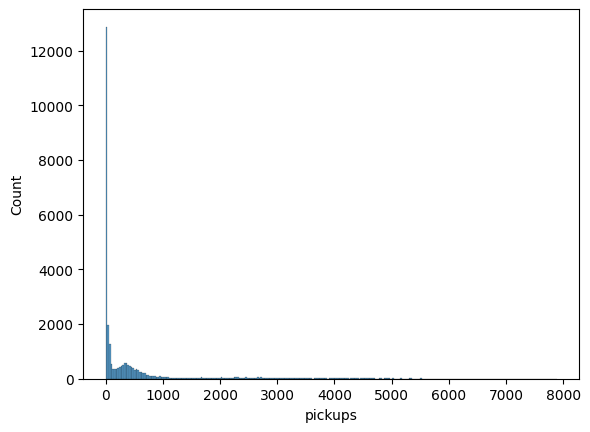

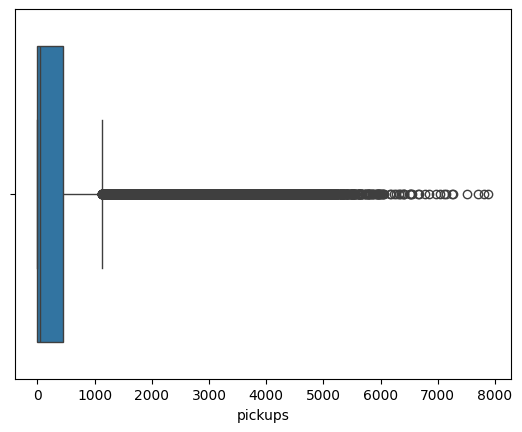

In [26]:
sns.histplot(data=df,x='pickups')
plt.show()
sns.boxplot(data=df,x='pickups')
plt.show()

- The distribution of pickups is highly right skewed
- There are a lot of outliers in this variable
- While mostly the number of pickups are at a lower end, we have observations where the number of pickups went as high as 8000

####  **Observations on Visibility**

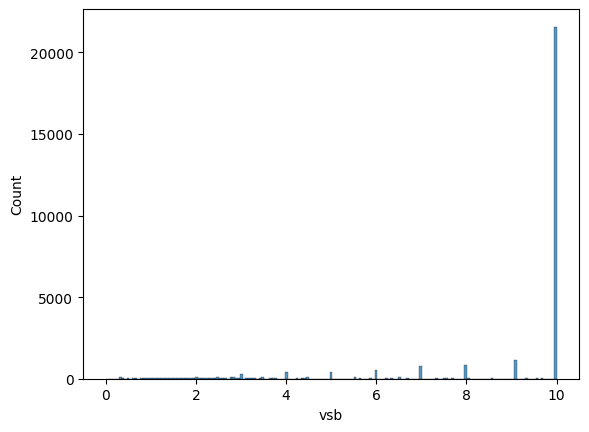

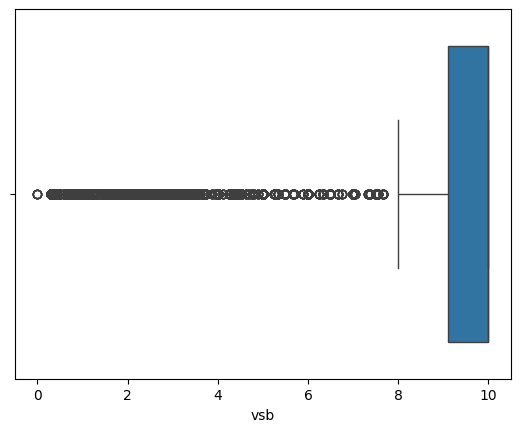

In [27]:
sns.histplot(data=df,x='vsb')
plt.show()
sns.boxplot(data=df,x='vsb')
plt.show()

- The `visibility` column is is left-skewed
- There are, however, outliers towards the left, indicating that visibility is extremely low on some days

#### **Observations on Temperature**

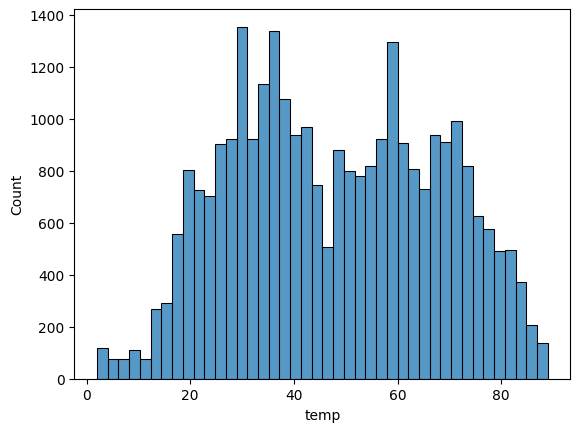

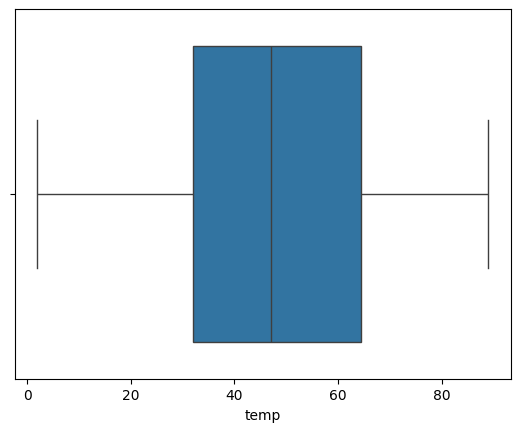

In [28]:
sns.histplot(data=df,x='temp')
plt.show()
sns.boxplot(data=df,x='temp')
plt.show()

- Temperature does not have any outliers*
- 50% of the temperature values are less than 45F, indicating cold weather conditions

#### **Observations on Dew point**

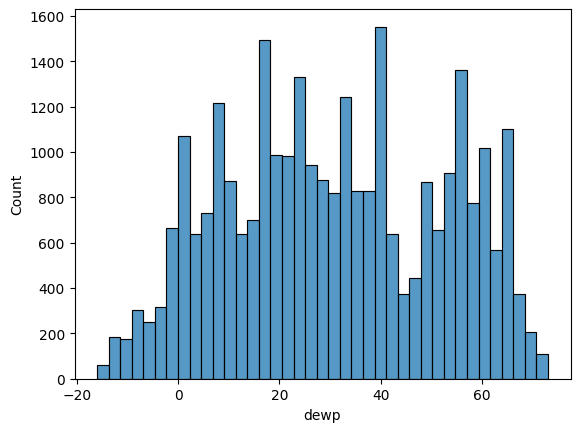

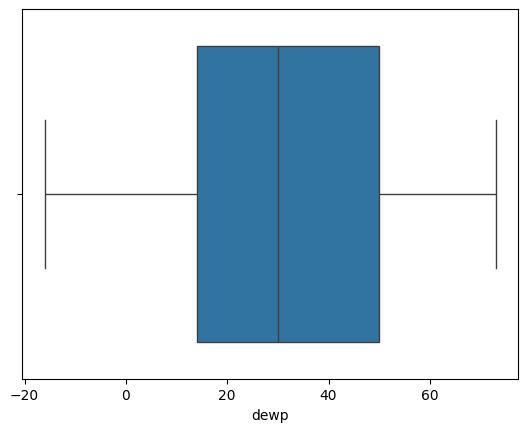

In [29]:
sns.histplot(data=df,x='dewp')
plt.show()
sns.boxplot(data=df,x='dewp')
plt.show()

- There are no outliers for dew point either*
- The distribution is similar to that of temperature. It suggests possible correlation between the two variables
- Dew point is an indication of humidity, which is correlated with temperature

#### **Observations on Sea level pressure**

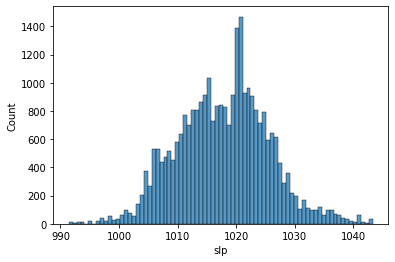

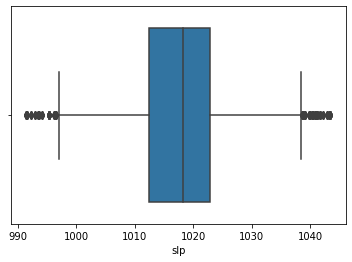

In [ ]:
sns.histplot(data=df,x='slp')
plt.show()
sns.boxplot(data=df,x='slp')
plt.show()

- Sea level pressure distribution is close to normal
- There are a few outliers on both the ends

####  **Observations on Liquid Precipitation (Rain)**

**1 hour liquid precipitation**

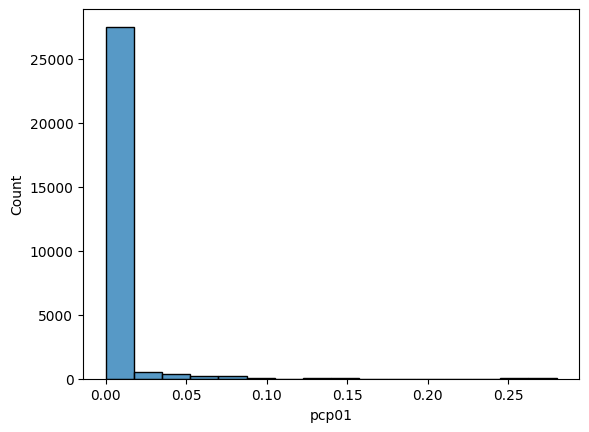

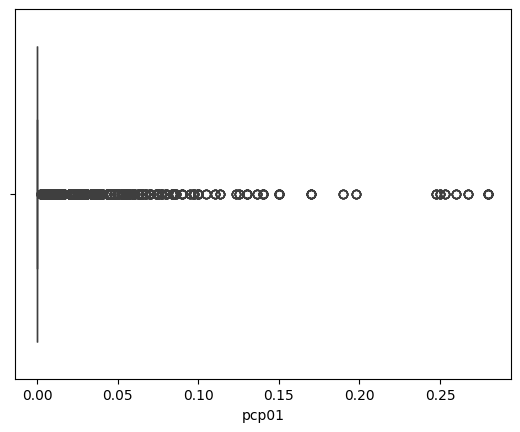

In [30]:
sns.histplot(data=df,x='pcp01')
plt.show()
sns.boxplot(data=df,x='pcp01')
plt.show()

**6 hour liquid precipitation**

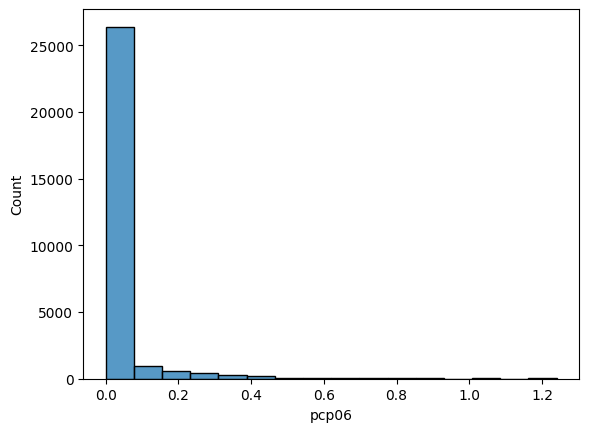

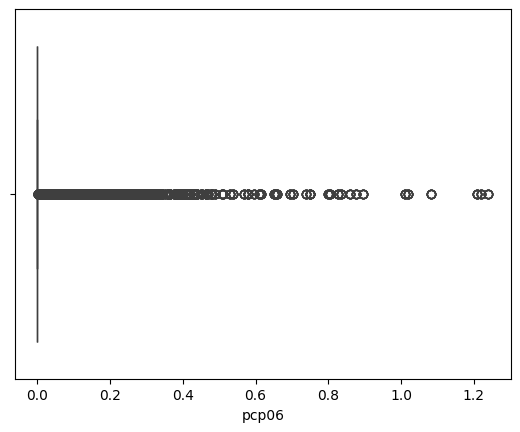

In [31]:
sns.histplot(data=df,x='pcp06')
plt.show()
sns.boxplot(data=df,x='pcp06')
plt.show()

**24 hour liquid precipitation**

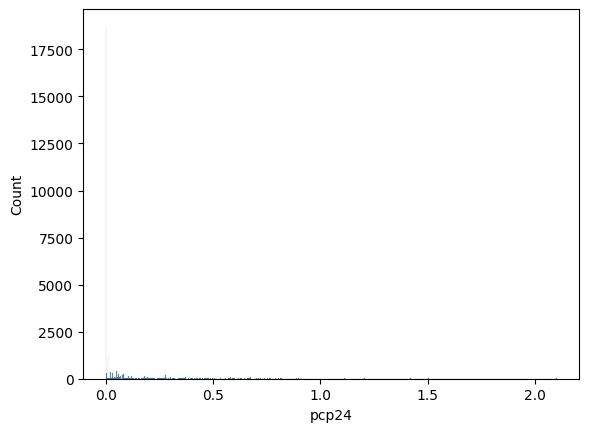

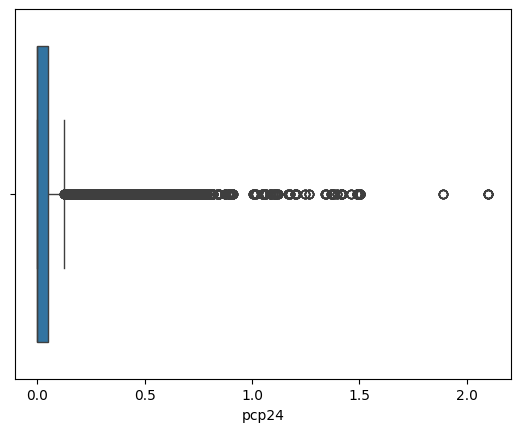

In [32]:
sns.histplot(data=df,x='pcp24')
plt.show()
sns.boxplot(data=df,x='pcp24')
plt.show()

#### **Observations on Snow Depth**

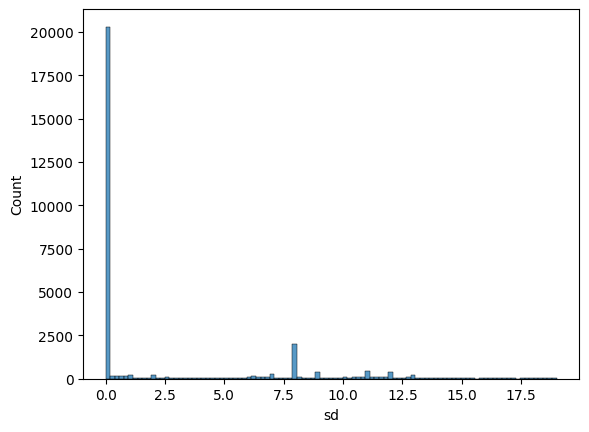

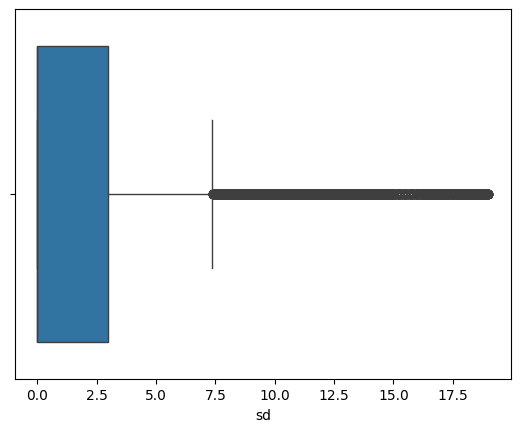

In [33]:
sns.histplot(data=df,x='sd')
plt.show()
sns.boxplot(data=df,x='sd')
plt.show()

- We can observe that there is snowfall in the time period that we are analyzing
- There are outliers in this data

#### **Observations on holiday**

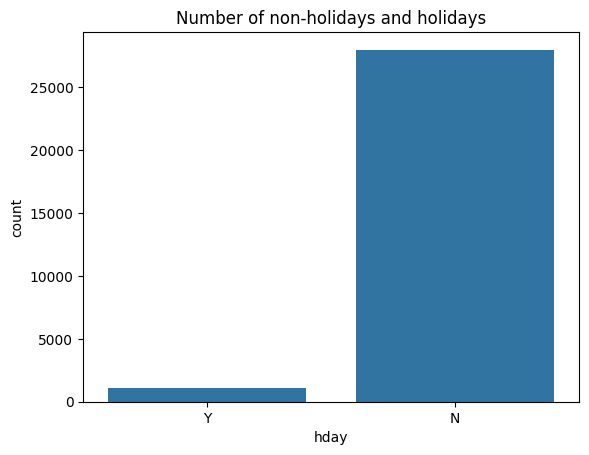

In [34]:
sns.countplot(data=df,x='hday')
plt.title('Number of non-holidays and holidays')
plt.show()

- The number of pickups is more on non-holidays than on holidays

#### **Observations on borough**

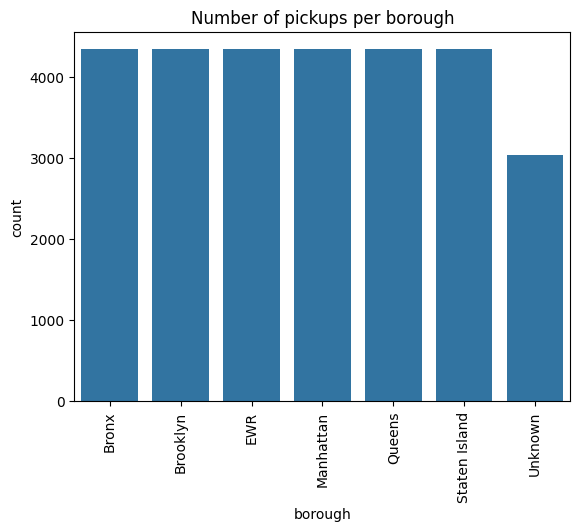

In [35]:
sns.countplot(data=df,x='borough')
plt.xticks(rotation = 90)
plt.title('Number of pickups per borough')
plt.show()

- The observations are uniformly distributed across the boroughs except the observations that had NaN values and were attributed to Unknown borough

### **Bivariate Analysis**

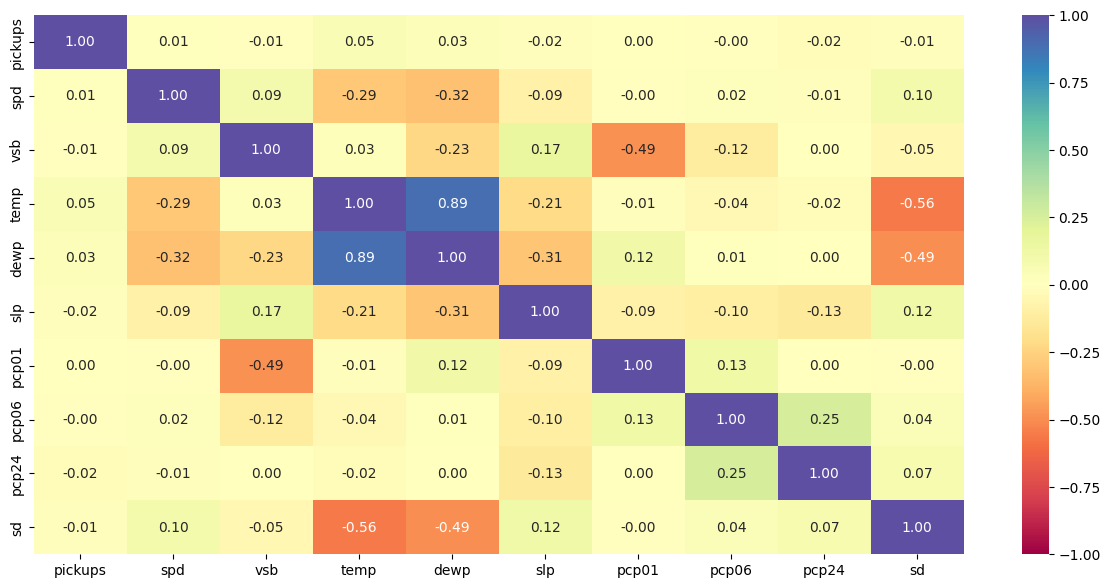

In [36]:
# Check for correlation among numerical variables
num_var = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']
corr = df[num_var].corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- As expected, temperature shows high correlation with dew point
- Visibility is negatively correlated with precipitation. If it is raining heavily, then the visibility will be low. This is aligned with our intuitive understanding
* Snow depth of course would be negatively correlated with temperature.
* Wind speed and sea level pressure are negatively correlated with temperature
* It is important to note that correlation does not imply causation
* There does not seem to be a strong relationship between number of pickups and weather stats

#### **Pickups across months**

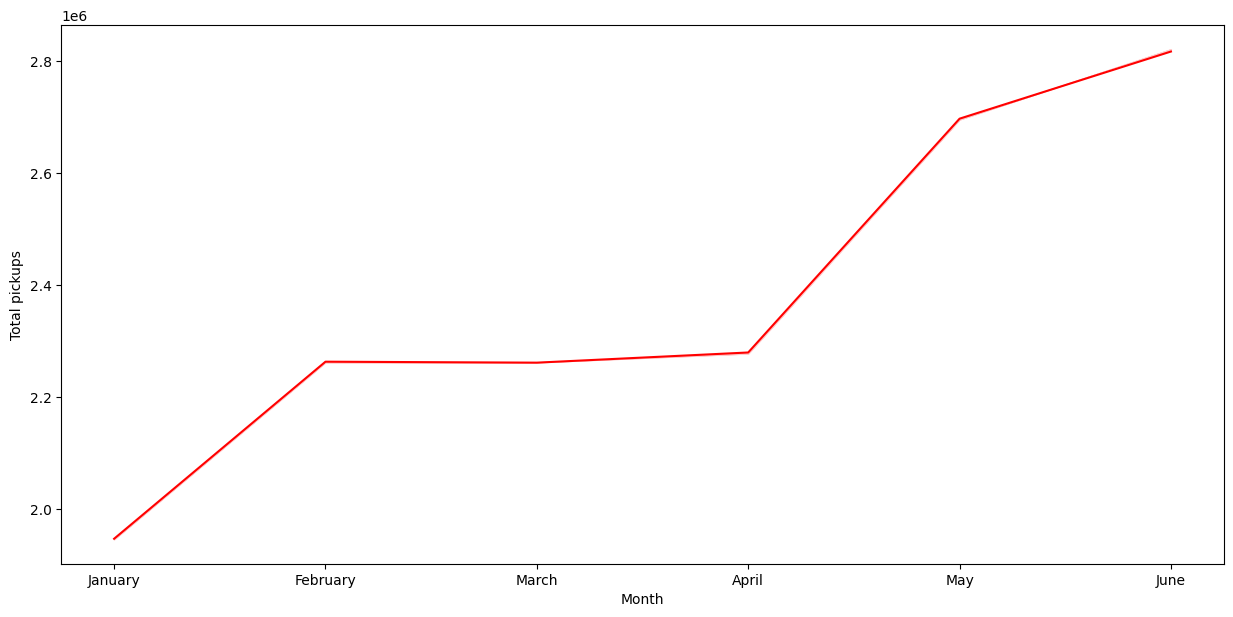

In [37]:
cats = df.start_month.unique().tolist()
df.start_month = pd.Categorical(df.start_month, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="start_month", y="pickups", ci=False, color="red", estimator='sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

- There is a clear increasing trend in monthly bookings
- The number of pickups in June is almost 2.8 times of that of January

#### **Pickups vs Days of the Month**

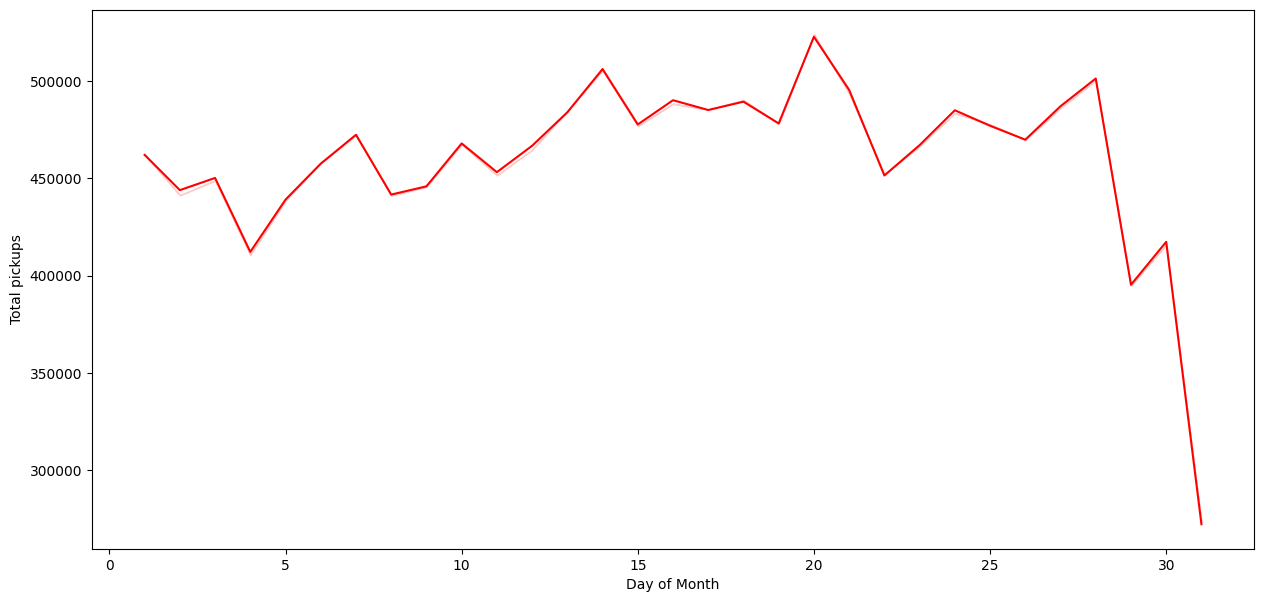

In [38]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="start_day", y="pickups", estimator='sum', ci=False, color="red")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

- There is a steep fall in the number of pickups over the last days of the month
- This can partially be attributed to month of Feb having just 28 days. We can drop Feb and have a look at this chart again
- There is a peak in the bookings around the 20th day of the month

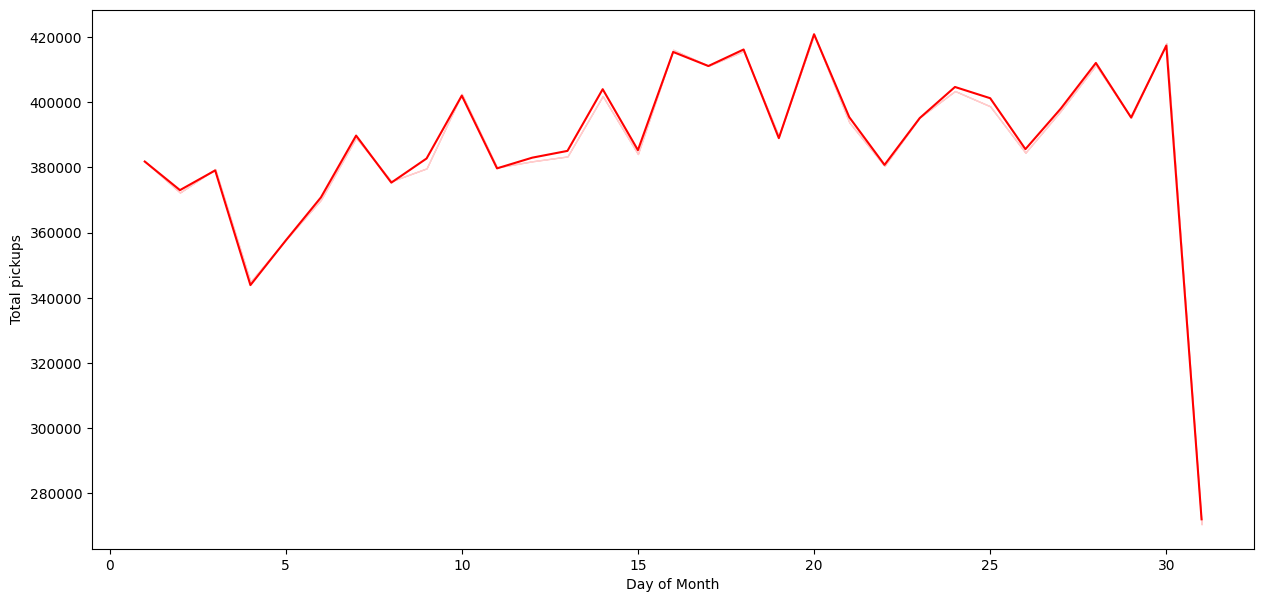

In [39]:
# Let us drop the Feb month and see the trend
df_not_feb =  df[df['start_month'] != 'February']
plt.figure(figsize=(15,7))
sns.lineplot(data=df_not_feb, x="start_day", y="pickups", estimator='sum', ci=False, color="red")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

- Number of pickups for 31st is still low because not all months have the 31st day

#### **Pickups across Hours of the Day**

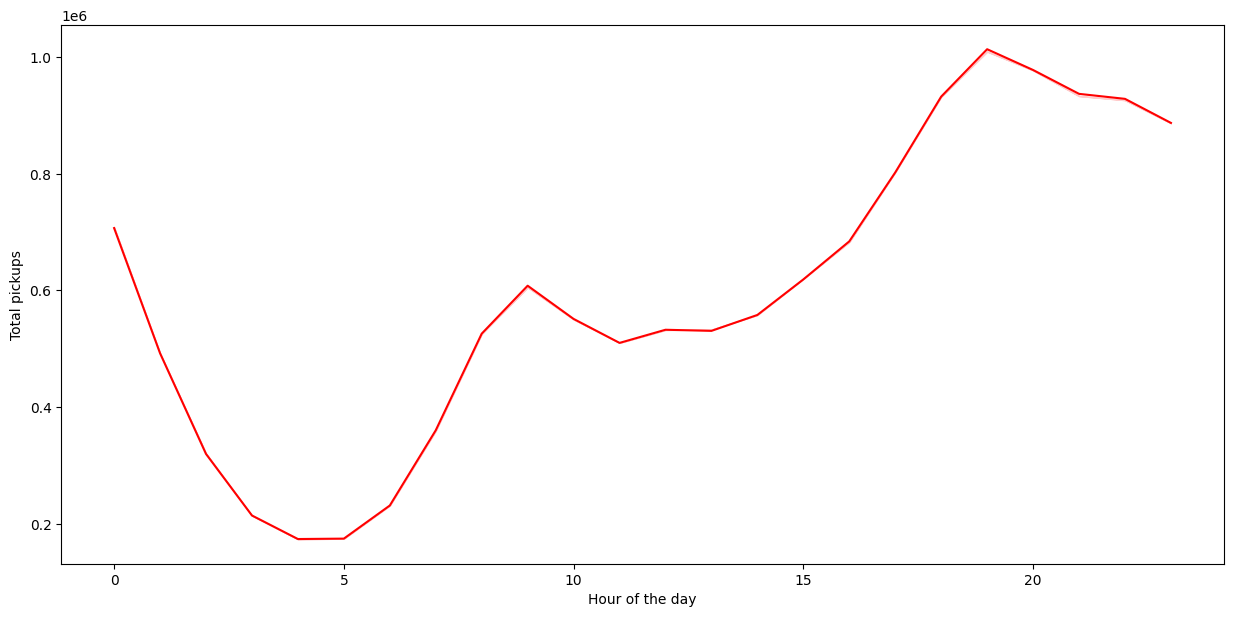

In [40]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="start_hour", y="pickups", estimator='sum', ci=False, color="red")
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.show()

- Bookings peak around the 19th and 20th hour of the day*
- The peak can be attributed to the time when people leave their workplaces
- From 5 AM onwards, we can see an increasing trend till 10, possibly the office rush
- Pickups then go down from 10AM to 12PM post which they start increasing

#### **Pickups across Weekdays**

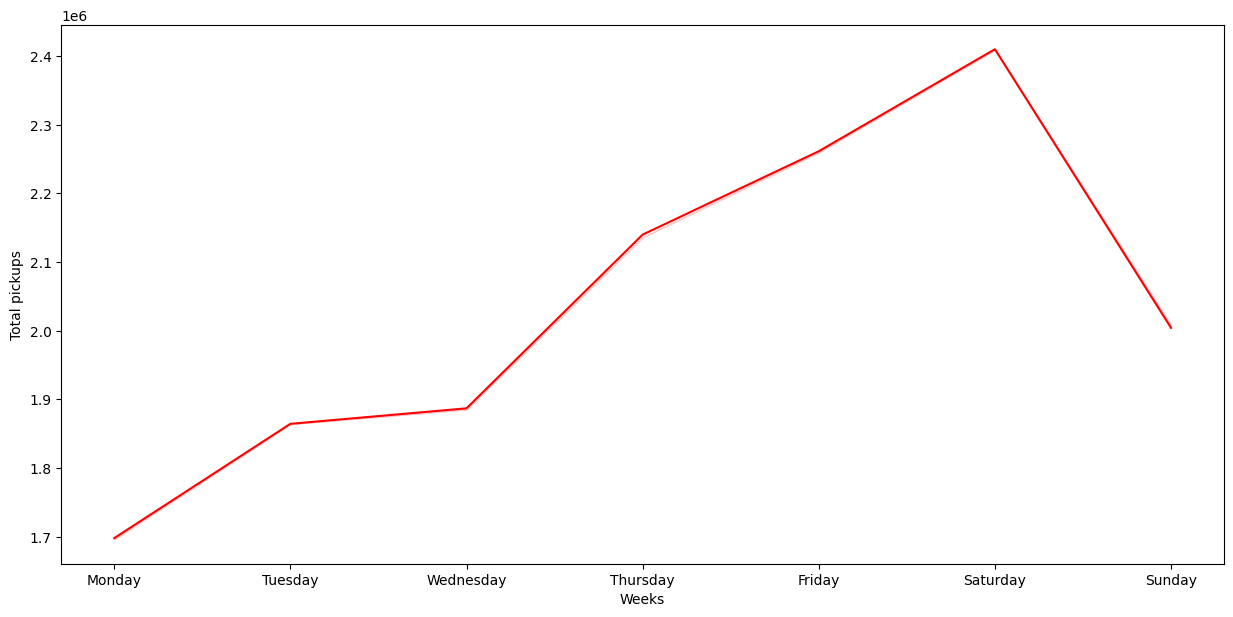

In [41]:
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df.week_day = pd.Categorical(df.week_day, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="week_day", y="pickups", ci=False, color="red", estimator='sum')
plt.ylabel('Total pickups')
plt.xlabel('Weeks')
plt.show()

- Pickups gradually increase as the week progresses and starts dropping down after Saturday
- We need to do more investigation to understand why demand for Uber is low in the beginning of the week

#### **Pickups across Borough**

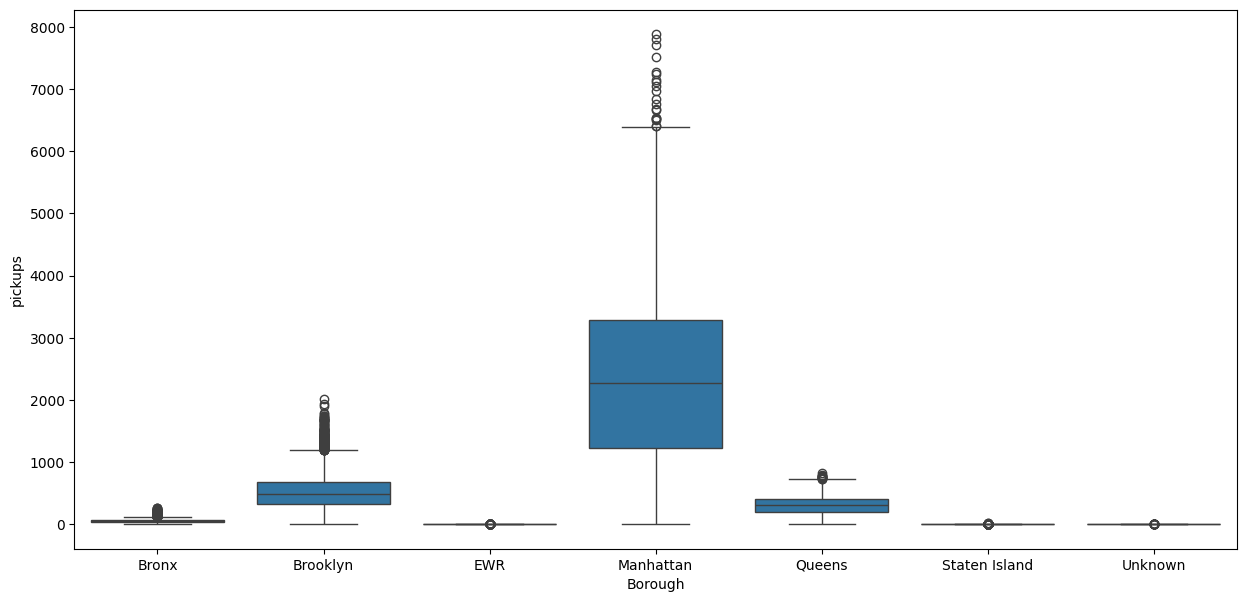

In [42]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['borough'], y=df['pickups'])
plt.ylabel('pickups')
plt.xlabel('Borough')
plt.show()


- Manhattan has the highest number of bookings
- Brooklyn and Queens are distant followers
- EWR, Unknown and Staten Island have very low number of bookings. The demand is so small that probably it can be covered by the drop-offs of the inbound trips from other areas

#### **Relationship between pickups and holidays**

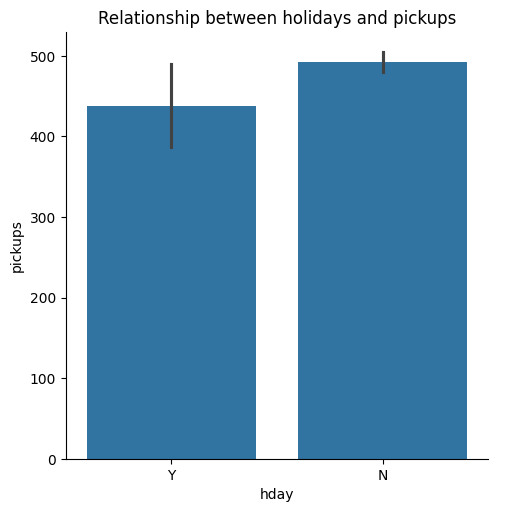

In [44]:
sns.catplot(x='hday', y='pickups', data=df, kind="bar")
plt.title('Relationship between holidays and pickups')
plt.show()

- The mean pickups on a holiday is lesser than that on a non-holiday

### **Multivariate Analysis**

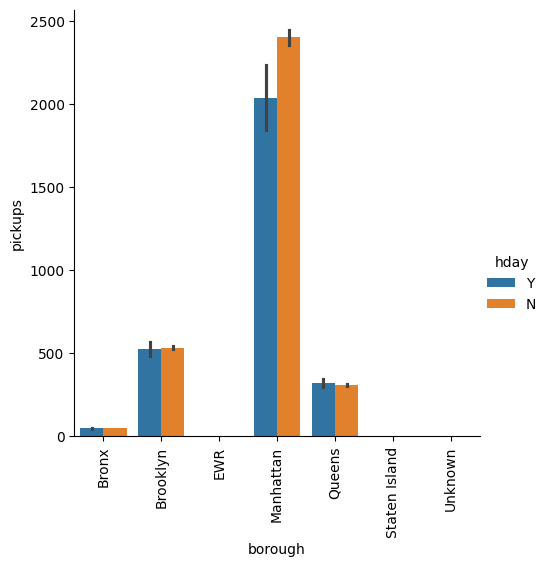

In [45]:
sns.catplot(x='borough', y='pickups', data=df, kind="bar", hue='hday')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Check if the trend is similar across boroughs
df.groupby(by = ['borough','hday'])['pickups'].mean()

borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
Unknown        N          2.057456
               Y          2.050420
Name: pickups, dtype: float64

- In all the boroughs, except Manhattan, the mean pickups on a holiday is very similar to that on a non holiday
- In Queens, mean pickups on a holiday is higher
- There are hardly any pickups in EWR

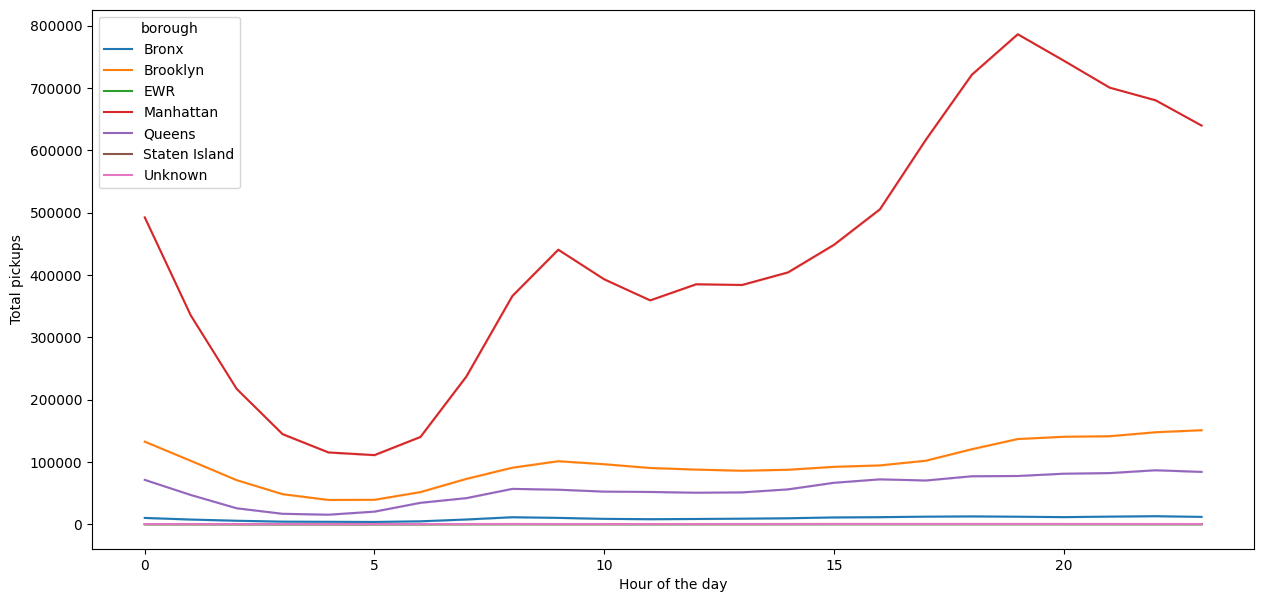

In [46]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="start_hour", y="pickups", hue='borough', estimator='sum', ci=False)
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.show()

- The number of pickups in Manhattan is very high and dominant when we see the spread across boroughs
- The hourly trend which we have observed earlier can be mainly attributed to the borough Manhattan, as rest of the other boroughs do not show any significant change for the number of pickups on the hourly basis

### **Outlier Detection and Treatment**

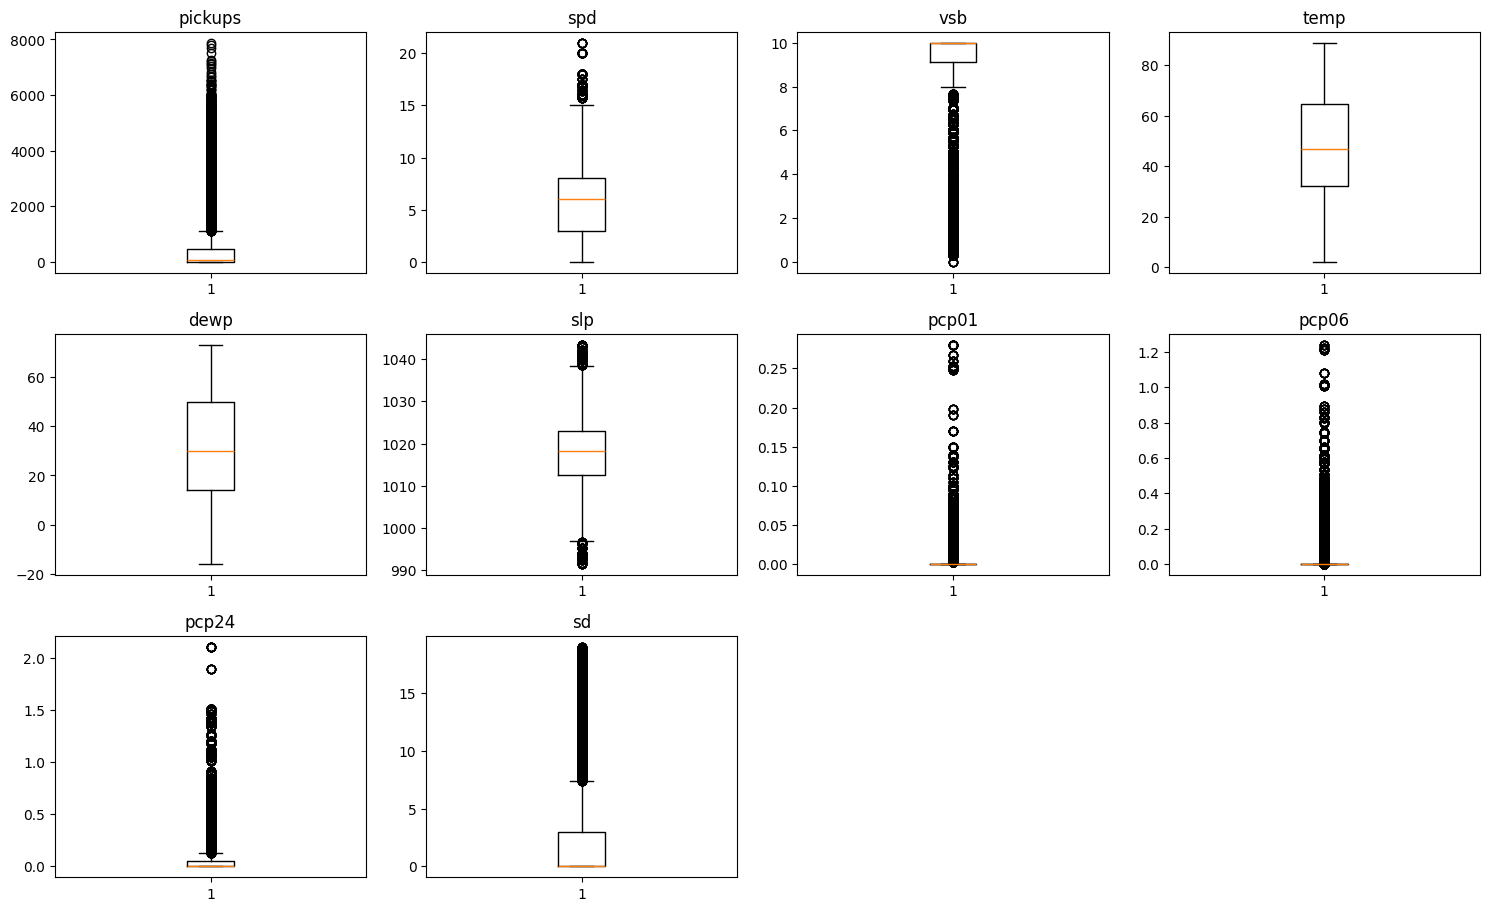

In [50]:
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- The pickups column has a wide range of values with lots of outliers. However we are not going to treat this column since the number of pickups can have a varying range and we can miss out on some genuine values if we treat this column
- Starting from spd to sd, all the columns are related to weather. The weather related variables have some outliers, however all of them seem to be genuine values. So we are not going to treat the outliers present in these columns

### **Actionable Insights and Recommendations**

#### **Insights**

The data spanned over every day of the first six months of the year 2015.
The main feature of interest here is the number of pickups.
Both from an environmental and business perspective, having cars roaming in an area while the demand is in another or filling the streets with cars during a low demand period while lacking during peak hours is inefficient. Thus we determined the factors that effect pickup and the nature of their effect.

We have been able to conclude that -  

1. Uber cabs are most popular in the Manhattan area of New York
2. Contrary to intuition, weather conditions do not have much impact on the number of Uber pickups
3. The demand for Uber has been increasing steadily over the months (Jan to June)
4. The rate of pickups is higher on the weekends as compared to weekdays
5. It is encouraging to see that New Yorkers trust Uber taxi services when they step out to enjoy their evenings
6. We can also conclude that people use Uber for regular office commutes.The demand steadily increases from 6 AM to 10 AM, then declines a little and starts picking up till midnight. The demand peaks at 7-8 PM
7. We need to further investigate the low demand for Uber on Mondays


#### **Recommendations to business**

1. Manhattan is the most mature market for Uber. Brooklyn, Queens, and Bronx show potential
2. There has been a gradual increase in Uber rides over the last few months and we need to keep up the momentum
3. The number of rides are high at peak office commute hours on weekdays and during late evenings on Saturdays. Cab availability must be ensured during these times
4. The demand for cabs is highest on Saturday nights. Cab availability must be ensured during this time of the week
5. Data should be procured for fleet size availability to get a better understanding of the demand-supply status and build a machine learning model to accurately predict pickups per hour, to optimize the cab fleet in respective areas
6. More data should be procured on price and a model can be built that can predict optimal pricing